In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.imagesource {
    font-size: xx-small;
}
</style>
""")

from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')

### Load the survey responses

In [4]:
url = "../../data/survey/ucb_personal_networks_clean.csv"

survey = Table.read_table(url)
survey

interview_number,interview_date,interview_time,respondent_gender,respondent_age,respondent_class,respondent_home,number_alters,alter1_gender,alter1_age,alter1_class,alter1_home,alter2_gender,alter2_age,alter2_class,alter2_home,alter3_gender,alter3_age,alter3_class,alter3_home,alter4_gender,alter4_age,alter4_class,alter4_home,alter5_gender,alter5_age,alter5_class,alter5_home
1,1/18/18,11:44:00 AM,Male,19,Freshman,Bay Area,5,Male,19,Freshman,Bay Area,Male,18,Freshman,Bay Area,Male,18,Freshman,LA Area,Female,18,Freshman,Bay Area,Male,17,Other,Bay Area
2,1/18/18,2:40:00 PM,Male,21,Senior,Rest of California,5,Female,21,Other,LA Area,Female,21,Other,Rest of California,Male,21,Other,Rest of California,Male,22,Other,Rest of California,Female,19,Sophomore,LA Area
3,1/18/18,2:50:00 PM,Female,20,Junior,LA Area,4,Male,22,Senior,LA Area,Female,20,Junior,Bay Area,Female,20,Junior,Bay Area,Female,21,Junior,LA Area,nan,nan,nan,nan
1,1/18/18,11:39:00 AM,Male,21,Senior,Bay Area,5,Female,26,Senior,Bay Area,Male,30,Other,Bay Area,Male,27,Senior,Bay Area,Male,24,Senior,Bay Area,Female,51,Other,Rest of World
2,1/18/18,7:00:00 PM,Male,20,Junior,LA Area,5,Female,52,Other,Rest of World,Male,60,Other,Rest of World,Female,18,Freshman,LA Area,Female,22,Senior,Rest of World,Female,64,Other,Rest of World
3,1/18/18,7:30:00 PM,Female,19,Sophomore,Rest of World,5,Female,19,Sophomore,Rest of World,Female,20,Sophomore,Rest of World,Female,19,Sophomore,Rest of World,Female,46,Other,Rest of World,Female,19,Sophomore,LA Area
1,1/19/18,11:45:00 AM,Female,20,Junior,LA Area,5,Male,24,Other,Rest of California,Male,24,Other,Rest of California,Female,45,Other,LA Area,Female,23,Senior,LA Area,Male,46,Other,LA Area
1,1/18/18,11:40:00 AM,Female,21,Junior,Rest of California,5,Male,62,Other,Rest of California,Male,21,Junior,Rest of California,Male,20,Senior,LA Area,Male,21,Senior,Rest of California,Female,21,Junior,Rest of California
1,1/18/18,7:42:00 PM,Female,21,Senior,LA Area,6+,Female,34,Other,Bay Area,Female,22,Senior,LA Area,Female,22,Senior,LA Area,Female,57,Other,Rest of United States,Female,19,Sophomore,Rest of United States
2,1/18/18,7:46:00 PM,Female,22,Senior,LA Area,5,Female,21,Senior,LA Area,Female,61,Other,LA Area,Female,23,Other,LA Area,Female,22,Senior,LA Area,Female,21,Junior,LA Area


How many responses are there?

In [3]:
survey.num_rows

124

### Who responded to the survey?

Look at the age distribution of respondents

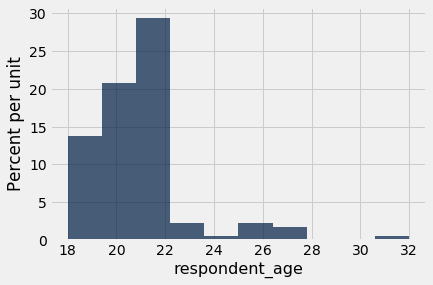

In [4]:
survey.select('respondent_age').hist()

Look at the gender distribution

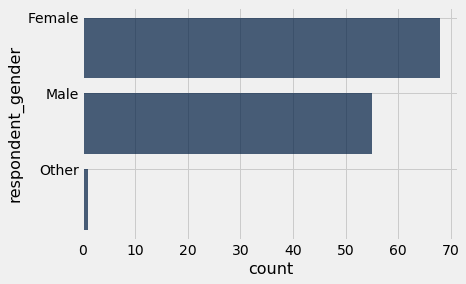

In [6]:
survey.group('respondent_gender').barh('respondent_gender')

Look at the class year

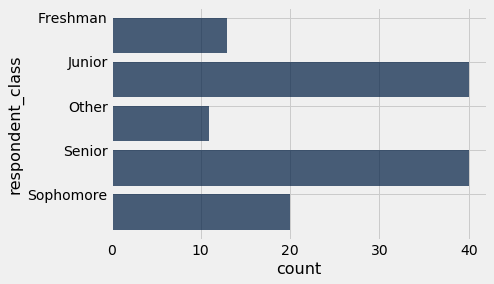

In [5]:
survey.group('respondent_class').barh('respondent_class')

### Relationship between respondent and first alter named: gender

In [7]:
#pd.crosstab(survey['respondent_gender'], survey['alter1_gender']) # this would show raw counts
pd.crosstab(survey['respondent_gender'], survey['alter1_gender'], normalize='index')

col_0,Female,Male,Other
row_0,,,
Female,0.735294,0.264706,0.0
Male,0.418182,0.581818,0.0
Other,0.000000,0.000000,1.0


In [8]:
pd.crosstab(survey['respondent_gender'], survey['alter1_gender']) # this would show raw counts

col_0,Female,Male,Other
row_0,,,
Female,50,18,0
Male,23,32,0
Other,0,0,1


In [9]:
obs_frac_nonhom = (18 + 23) / (50 + 18 + 23 + 32)
obs_frac_nonhom

0.3333333333333333

In [ ]:
# Berkeley undergrad gender breakdown source: 
# https://opa.berkeley.edu/uc-berkeley-fall-enrollment-data
# (based on Fall 2017 undergraduate enrollment)
prop_male = 0.47
prop_female = 1 - prop_male

rand_expected_mf = 2 * prop_male * prop_female
rand_expected_mf


In [13]:
permuted_alter_gender = survey.select('alter1_gender').sample(124) # NB: 124 rows in our dataset
permuted_dyads = Table().with_columns(
    'respondent_gender', survey.column('respondent_gender'),
    'alter1_gender', permuted_alter_gender.column(0))
permuted_dyads

respondent_gender,alter1_gender
Male,Female
Male,Female
Female,Male
Male,Female
Male,Female
Female,Male
Female,Female
Female,Female
Female,Female
Female,Male


Let's write a function to help calculate the fraction of dyads that goes from male to female or from female to male.

In [14]:
def frac_mf_dyads(permuted_df):
    """
    Calculate the fraction of dyads that is male to female OR female to male
    """
    counts_mf = permuted_dyads.group(['respondent_gender', 'alter1_gender']).where('respondent_gender', 'Male').where('alter1_gender', 'Female')
    mf = counts_mf.column('count').item(0)
    counts_fm = permuted_dyads.group(['respondent_gender', 'alter1_gender']).where('respondent_gender', 'Male').where('alter1_gender', 'Female')
    fm = counts_fm.column('count').item(0)
    
    return((mf + fm)/permuted_df.num_rows)
    
    

#permuted_frac_mf = permuted_dyads.where()
frac_mf_dyads(permuted_dyads)

0.43548387096774194

Now take many resamples and calculate the fraction of cross-gender edges for each one

In [15]:
nonhom_fracs = make_array()

for _ in np.arange(10000):
    permuted_alter_gender = survey.select('alter1_gender').sample(124) # NB: 124 rows in our dataset
    permuted_dyads = Table().with_columns(
        'respondent_gender', survey.column('respondent_gender'),
        'alter1_gender', permuted_alter_gender.column(0))
    nonhom_fracs = np.append(nonhom_fracs, frac_mf_dyads(permuted_dyads))
null_fracs = Table().with_column('frac_dyads_nonhom', nonhom_fracs)

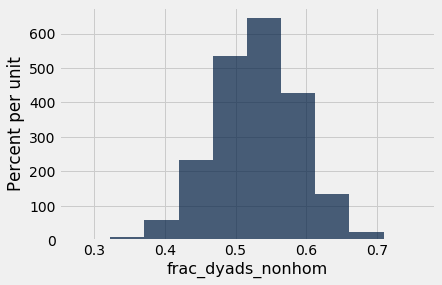

In [16]:
null_fracs.hist('frac_dyads_nonhom')

Let's add a plot showing where our observed value is, so that we can easily compare the observed value to the null distribution.

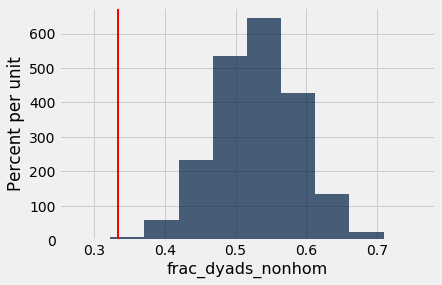

In [17]:
null_fracs.hist('frac_dyads_nonhom')
#plt.scatter(obs_frac_nonhom,0,c='red',s=80);
plt.axvline(x=obs_frac_nonhom,c='red',linewidth=2);

In [ ]:
# end of demo

In [ ]:
survey.to_df()[['respondent_age', 'alter1_age', 'alter2_age', 'alter3_age', 'alter4_age', 'alter5_age']].corr()

In [ ]:
survey.scatter('respondent_age', 'alter1_age')

Let's compare the expected value (average) of the null model to this distribution

In [ ]:
null_ev = 2 * prop_male * prop_female
null_fracs.hist('frac_dyads_nonhom')
#plt.scatter(null_ev,0,c='yellow',s=80);
plt.axvline(x=null_ev,c='yellow',linewidth=2);